In [48]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../Data/res_flexibility_MAPK14_v2.csv") 

data.head()

,protein,start ligand,target ligand,rmsd,bfactor,normalized bfactor,normal variate bfactor,res name,secondary structure,id
0,MAPK14,1KV1,1YQJ,9.180652,58.630000,1.597887,1.958952,A,0,34
1,MAPK14,1KV1,1YQJ,12.804216,57.938333,1.579036,1.897189,Y,0,35
2,MAPK14,1KV1,1YQJ,1.194000,38.252857,1.042533,0.139359,V,2,38
3,MAPK14,1KV1,1YQJ,0.653511,29.968000,0.816740,-0.600444,A,2,51
4,MAPK14,1KV1,1YQJ,0.494868,28.888571,0.787322,-0.696832,V,2,52


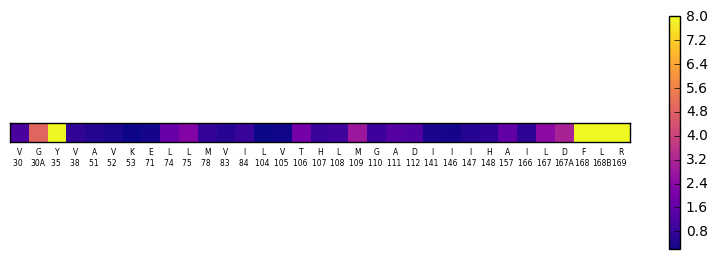

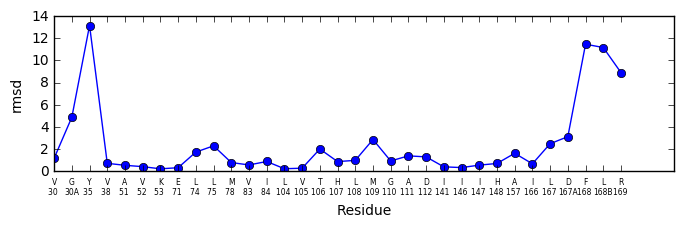

In [74]:
import numpy as np

selected = data.loc[(data['start ligand'] == '2YIX') & (data['target ligand'] == '3D83')]
rmsd = np.array(selected['rmsd'])
rmsd[rmsd > 8] = 8
rmsd_formatted = np.expand_dims(rmsd, axis=0)

plt.imshow(rmsd_formatted, cmap="plasma", interpolation='none')

fig = plt.gcf()
fig.set_size_inches(10,3)

ax = plt.gca()
labels = [r+'\n'+i for r,i in zip(selected['res name'], selected['id'])]
plt.xticks(np.arange(0,len(selected)),labels)
plt.yticks([],[])
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis='both', labelsize=5.5)

plt.colorbar()
plt.show()

plt.plot(np.array(selected['rmsd']), '-o')
plt.xticks(np.arange(0,len(selected)),labels)
ax = plt.gca()
ax.tick_params(axis='x', labelsize=5.5)
plt.xlabel('Residue')
plt.ylabel('rmsd')
fig = plt.gcf()
fig.set_size_inches(8,2)
plt.show()

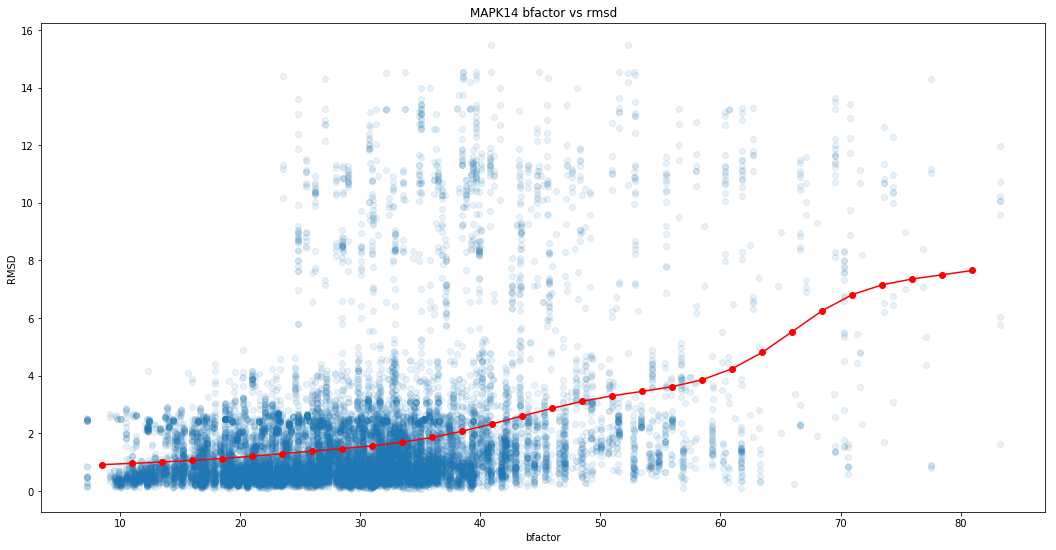

In [13]:
import numpy as np
import matplotlib.pyplot as plt
def weighted_moving_average(x,y,step_size=0.05,width=1):
    bin_centers  = np.arange(np.min(x),np.max(x)-0.5*step_size,step_size)+0.5*step_size
    bin_avg = np.zeros(len(bin_centers))

    #We're going to weight with a Gaussian function
    def gaussian(x,amp=1,mean=0,sigma=1):
        return amp*np.exp(-(x-mean)**2/(2*sigma**2))

    for index in range(0,len(bin_centers)):
        bin_center = bin_centers[index]
        weights = gaussian(x,mean=bin_center,sigma=width)
        bin_avg[index] = np.average(y,weights=weights)

    return (bin_centers,bin_avg)

plt.scatter(data['bfactor'], data['rmsd'], alpha=0.1)
x_avg, y_avg = weighted_moving_average(data['bfactor'], data['rmsd'], step_size=2.5, width=5)
plt.plot(x_avg, y_avg, 'o-', color='r')    
plt.title('MAPK14 bfactor vs rmsd')
plt.xlabel('bfactor')
plt.ylabel('RMSD')
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()
plt.show()

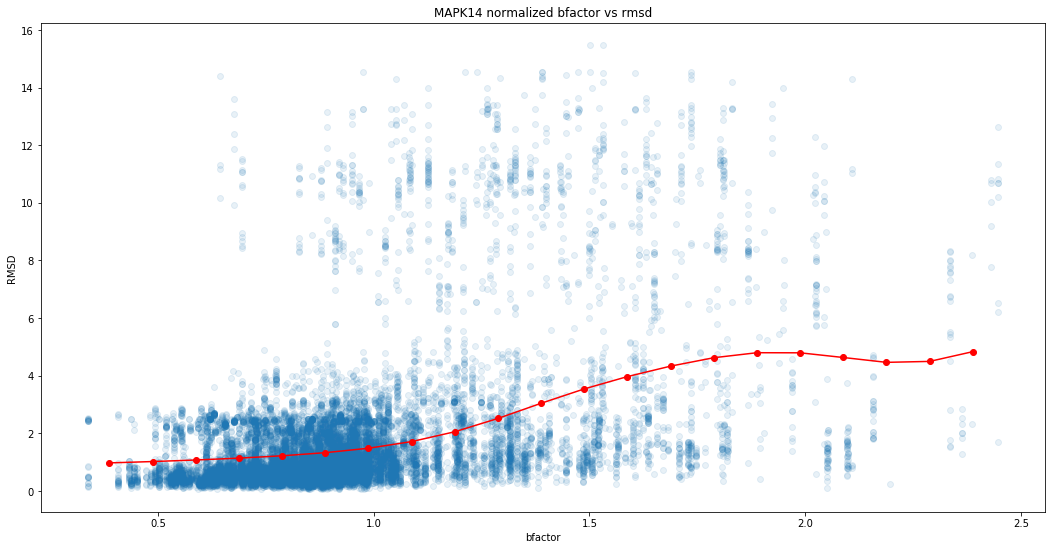

In [14]:
import numpy as np
def weighted_moving_average(x,y,step_size=0.05,width=1):
    bin_centers  = np.arange(np.min(x),np.max(x)-0.5*step_size,step_size)+0.5*step_size
    bin_avg = np.zeros(len(bin_centers))

    #We're going to weight with a Gaussian function
    def gaussian(x,amp=1,mean=0,sigma=1):
        return amp*np.exp(-(x-mean)**2/(2*sigma**2))

    for index in range(0,len(bin_centers)):
        bin_center = bin_centers[index]
        weights = gaussian(x,mean=bin_center,sigma=width)
        bin_avg[index] = np.average(y,weights=weights)

    return (bin_centers,bin_avg)

plt.scatter(data['normalized bfactor'], data['rmsd'], alpha=0.1)
x_avg_norm, y_avg_norm = weighted_moving_average(data['normalized bfactor'], data['rmsd'], step_size=0.1, width=0.2)
plt.plot(x_avg_norm, y_avg_norm, 'o-', color='r')    
plt.title('MAPK14 normalized bfactor vs rmsd')
plt.xlabel('bfactor')
plt.ylabel('RMSD')
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()
plt.show()

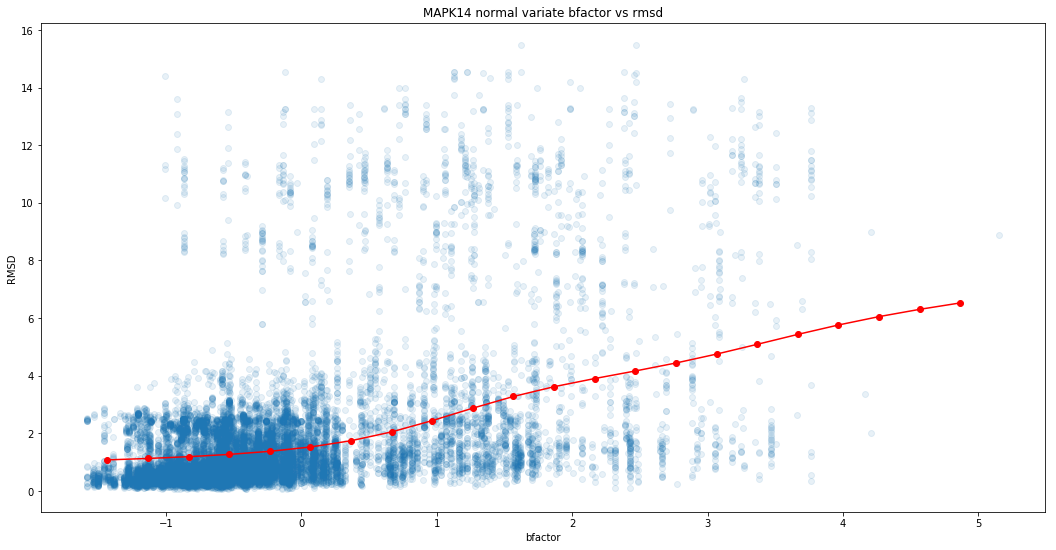

In [19]:
import numpy as np
def weighted_moving_average(x,y,step_size=0.05,width=1):
    bin_centers  = np.arange(np.min(x),np.max(x)-0.5*step_size,step_size)+0.5*step_size
    bin_avg = np.zeros(len(bin_centers))

    #We're going to weight with a Gaussian function
    def gaussian(x,amp=1,mean=0,sigma=1):
        return amp*np.exp(-(x-mean)**2/(2*sigma**2))

    for index in range(0,len(bin_centers)):
        bin_center = bin_centers[index]
        weights = gaussian(x,mean=bin_center,sigma=width)
        bin_avg[index] = np.average(y,weights=weights)

    return (bin_centers,bin_avg)

plt.scatter(data['normal variate bfactor'], data['rmsd'], alpha=0.1)
x_avg_norm, y_avg_norm = weighted_moving_average(data['normal variate bfactor'], data['rmsd'], step_size=0.3, width=0.75)
plt.plot(x_avg_norm, y_avg_norm, 'o-', color='r')    
plt.title('MAPK14 normal variate bfactor vs rmsd')
plt.xlabel('bfactor')
plt.ylabel('RMSD')
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()
plt.show()

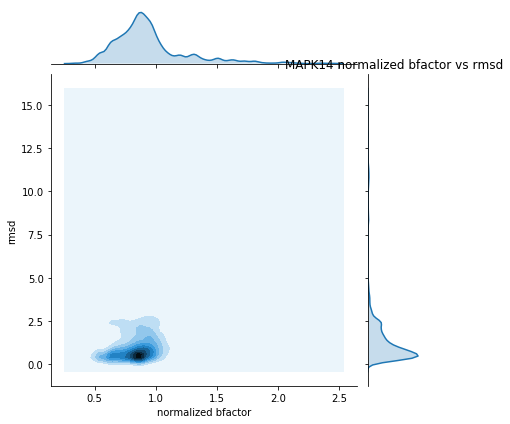

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.jointplot(x='normalized bfactor', y='rmsd', data=data, kind='kde')
plt.title('MAPK14 normalized bfactor vs rmsd')
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()

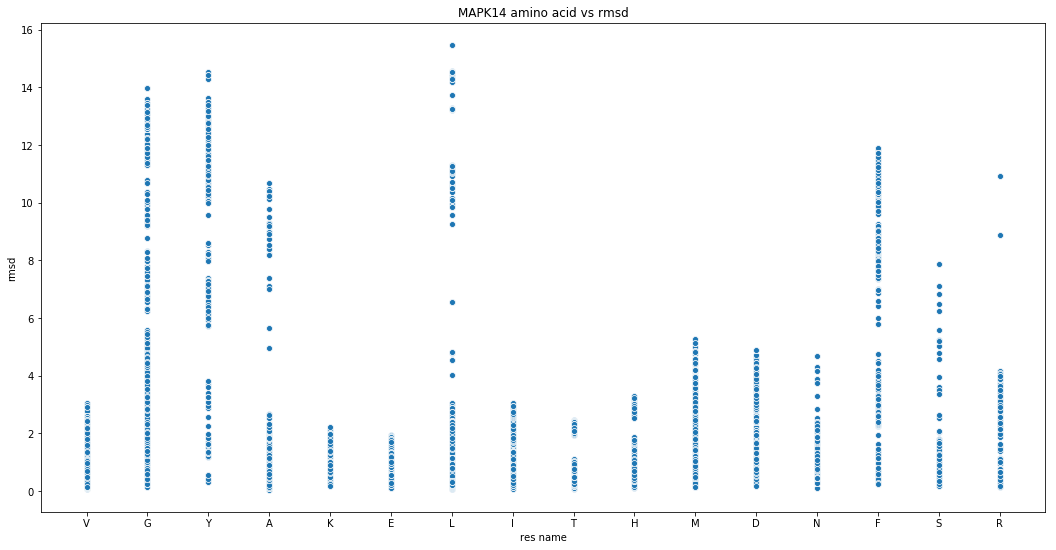

In [8]:
g = sns.scatterplot(x='res name', y='rmsd', data=data)
plt.title('MAPK14 amino acid vs rmsd')
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()

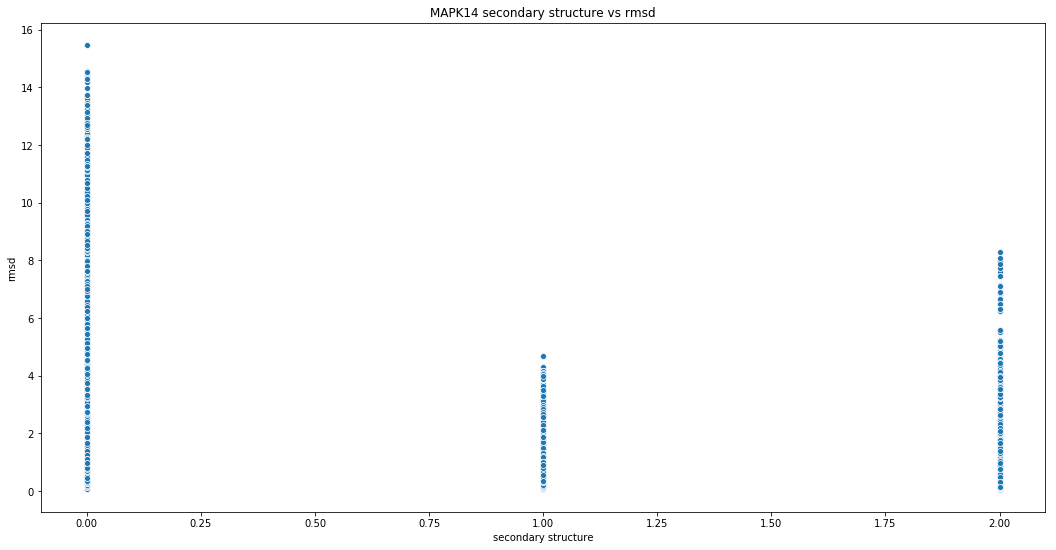

In [9]:
g = sns.scatterplot(x='secondary structure', y='rmsd', data=data)
plt.title('MAPK14 secondary structure vs rmsd')
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()

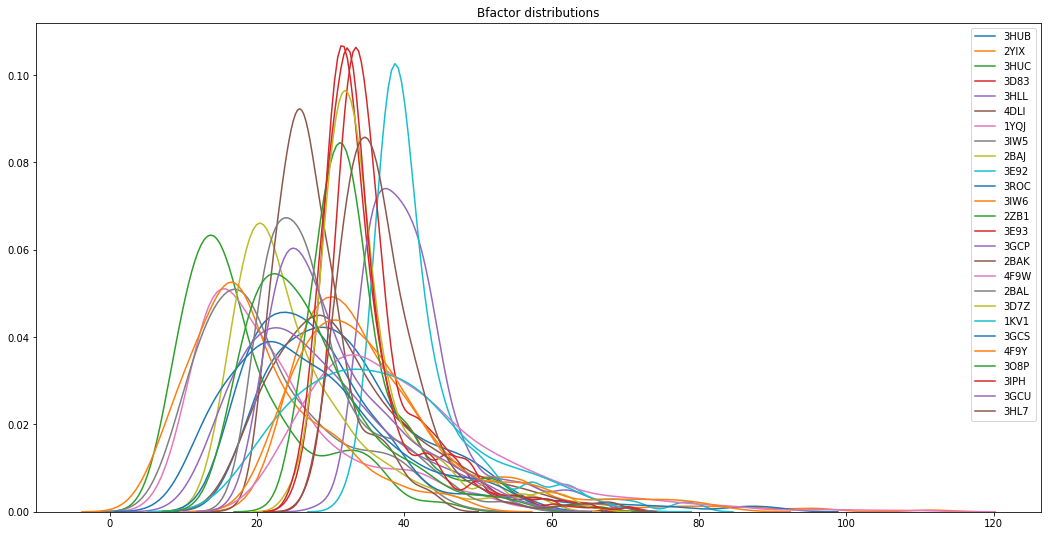

In [20]:
import pickle
infile = open('../Data/MAPK14_ASL_to_resinfo_dict', 'rb')
ASL_to_feature = pickle.load(infile)
infile.close()


for protein in ASL_to_feature:
    for ligand in ASL_to_feature[protein]:
        bfactors = []
        for asl in ASL_to_feature[protein][ligand]:
            bfactors.append(ASL_to_feature[protein][ligand][asl][0])
        sns.distplot(bfactors, hist=False, label=ligand);
plt.title('Bfactor distributions')
plt.show()

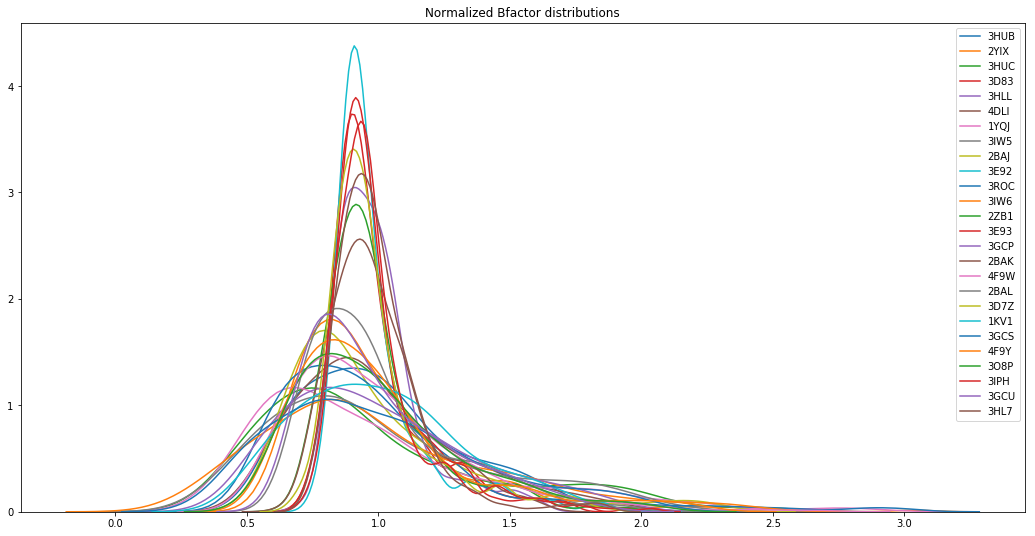

In [21]:
for protein in ASL_to_feature:
    for ligand in ASL_to_feature[protein]:
        bfactors = []
        for asl in ASL_to_feature[protein][ligand]:
            bfactors.append(ASL_to_feature[protein][ligand][asl][1])
        sns.distplot(bfactors, hist=False, label=ligand);
plt.title('Normalized Bfactor distributions')
plt.show()

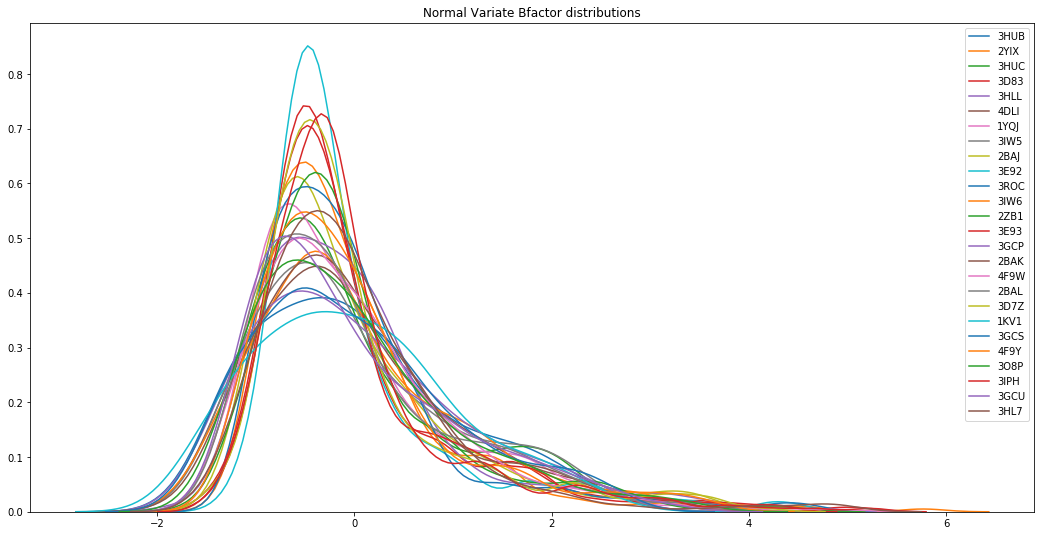

In [22]:
for protein in ASL_to_feature:
    for ligand in ASL_to_feature[protein]:
        bfactors = []
        for asl in ASL_to_feature[protein][ligand]:
            bfactors.append(ASL_to_feature[protein][ligand][asl][2])
        sns.distplot(bfactors, hist=False, label=ligand);
plt.title('Normal Variate Bfactor distributions')
plt.show()